# Introdución a Python para Ciencia de Datos
## Análisis de Datos

<center>
    <img src="figures/python.jpg" width="500" />
</center>

## Pandas
- Manipulación y análisis de datos
- https://pandas.pydata.org/

# Objeto Series

In [7]:
import pandas as pd
s1 = pd.Series([1, -3, 5.1, 'hola', 6, 8])
print(s1)
#print(s1.index)
#print(s1.index.tolist())
print(s1.values)

0       1
1      -3
2     5.1
3    hola
4       6
5       8
dtype: object
[1 -3 5.1 'hola' 6 8]


In [8]:
s2 = pd.Series([[3, 4], 5.1, 8, 6, 'chao'], index=['dos','tres','cuatro','cinco','seis',])
print(s2)
print('---------')
s3 = {'animal':1, 'peso':8.1, 'tamano':90, 'patas':4}
s3 = pd.Series(s3)
print(s3)
print('+++', s3['peso'])

dos       [3, 4]
tres         5.1
cuatro         8
cinco          6
seis        chao
dtype: object
---------
animal     1.0
peso       8.1
tamano    90.0
patas      4.0
dtype: float64
+++ 8.1


In [10]:
import numpy as np

print('1)', s3.iloc[1] )
print('2)',  s3.iloc[:2] )
print('3)',  s3.mean() )
print('4)',  np.sqrt(s3) )

1) 8.1
2) animal    1.0
peso      8.1
dtype: float64
3) 25.775
4) animal    1.000000
peso      2.846050
tamano    9.486833
patas     2.000000
dtype: float64


# Objeto DataFrame

In [11]:
dict1 = {'lunes':[4, 6, 9], 'martes':[9, 3, 0], 'miercoles':[6, 7, 3]}
df1 = pd.DataFrame(dict1)
print(df1)
print('------')
print(df1['lunes'])
print('------')
print(df1.martes)


   lunes  martes  miercoles
0      4       9          6
1      6       3          7
2      9       0          3
------
0    4
1    6
2    9
Name: lunes, dtype: int64
------
0    9
1    3
2    0
Name: martes, dtype: int64


In [14]:
df2 = pd.DataFrame(dict1, index=['casa', 'patio', 'bodega'])
print(df2)
print(df2.columns)
print(df2.index)
print(df2.values)


        lunes  martes  miercoles
casa        4       9          6
patio       6       3          7
bodega      9       0          3
Index(['lunes', 'martes', 'miercoles'], dtype='object')
Index(['casa', 'patio', 'bodega'], dtype='object')
[[4 9 6]
 [6 3 7]
 [9 0 3]]


In [26]:
df2['jueves'] = [7, 4, 2]
print(df2)
print('++++++++++++++++++++')
print( df2.iloc[1]) 

        lunes  martes  miercoles  jueves
casa        4       9          6       7
patio       6       3          7       4
bodega      9       0          3       2
++++++++++++++++++++
lunes        6
martes       3
miercoles    7
jueves       4
Name: patio, dtype: int64


# Manejo de DataFrames

In [28]:
#dataframe
import pandas as pd
dic = {'hora': ['18:00', '18:00', '11:00', '11:00', '10:00'], 'temp': [47.3, 48.1, 52.3, 51.1, 47.8], 
       'acel':[{'x':10, 'y':12}, {'x':11, 'y':13}, {'x':10, 'y':12}, {'x':13, 'y':13}, {'x':15, 'y':17}] }
df = pd.DataFrame(dic, index=['lu', 'ma', 'mi', 'ju', 'vi'])
display(df)

,hora,temp,acel
lu,18:00,47.3,"{'x': 10, 'y': 12}"
ma,18:00,48.1,"{'x': 11, 'y': 13}"
mi,11:00,52.3,"{'x': 10, 'y': 12}"
ju,11:00,51.1,"{'x': 13, 'y': 13}"
vi,10:00,47.8,"{'x': 15, 'y': 17}"


In [29]:
print(df.temp)
print('+++++')
print(type(df.temp))
print('+++++')
print(list(df.temp))

lu    47.3
ma    48.1
mi    52.3
ju    51.1
vi    47.8
Name: temp, dtype: float64
+++++
<class 'pandas.core.series.Series'>
+++++
[47.3, 48.1, 52.3, 51.1, 47.8]


In [30]:
display( df[df.temp>50.0] )

,hora,temp,acel
mi,11:00,52.3,"{'x': 10, 'y': 12}"
ju,11:00,51.1,"{'x': 13, 'y': 13}"


In [31]:
display( df[(df.temp>50.0) & (df.temp<52.0)] )

,hora,temp,acel
ju,11:00,51.1,"{'x': 13, 'y': 13}"


In [36]:
aceldf = df.acel.to_dict()
aceldf = pd.DataFrame(aceldf)
newdf = df.join(aceldf.T)
newdf = newdf.drop(columns=['acel'])
display(newdf)

,hora,temp,x,y
lu,18:00,47.3,10,12
ma,18:00,48.1,11,13
mi,11:00,52.3,10,12
ju,11:00,51.1,13,13
vi,10:00,47.8,15,17


In [37]:
display( newdf[(newdf.temp>50.0) & (newdf.y<13)] )

,hora,temp,x,y
mi,11:00,52.3,10,12


# Compatibilidad con Excel

In [51]:
newdf.temp[4] = 100
display(newdf)
newdf.to_excel('misdatos.xlsx')

C:\Users\felea\AppData\Local\Temp\ipykernel_17856\2914574241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.temp[4] = 100


,hora,temp,x,y
lu,18:00,47.3,10,12
ma,18:00,48.1,11,13
mi,11:00,52.3,10,12
ju,11:00,51.1,13,13
vi,10:00,100.0,15,17


In [52]:
datos = pd.read_excel('misdatos.xlsx', index_col=0)
display(datos)

,hora,temp,x,y
lu,18:00,47.3,10,12
ma,18:00,48.1,11,13
mi,11:00,52.3,10,12
ju,11:00,51.1,13,13
vi,10:00,100.0,15,17


# Gráficos en Pandas

<class 'str'>


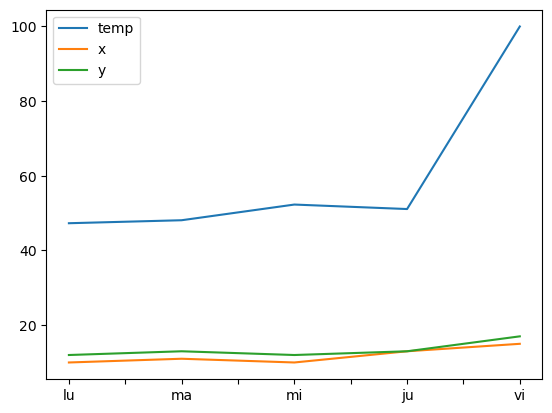

In [53]:
datos.plot()
print( type(datos.hora.iloc[0]) )

temp       Axes(0.125,0.11;0.227941x0.77)
x       Axes(0.398529,0.11;0.227941x0.77)
y       Axes(0.672059,0.11;0.227941x0.77)
dtype: object

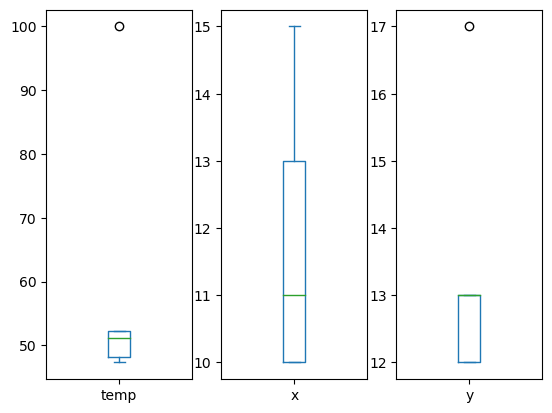

In [54]:
datos.plot(kind='box', subplots=True)

# ¡Gracias por su atención!